## Capstone Project - The Battle of the Neighborhoods (Week 2)
##### by IBM/Coursera

## Table of contents:
##### 1. Introduction: Business Problem
##### 2. Data
##### 3. Methodology
##### 4. Analysis
##### 5. Results and Discussion
##### 6. Conclusion

### 1. Introduction: Business Problem

In this part we shall discuss the business problem and the audience who could be interested in the results of this project.

**1.1 Scenario and Background**

I am trying to get a data scientist, adding to my MBA degree, and currently living in Frankfurt-am-Main, Germany. I enjoy many amenities in the neighborhood , such as international cousine restaurants, cafes, food shops and some entertainment options. Recently, I have been offered a opportunity to work in New York, US.

Well, I am really very excited about the future job, I am also a little stressed about to secure a comparable place to live in New York. Therefore, I decided to apply the learned skills during the IBM-Coursera course to explore possibilities to make sure my decision about changing place of living is factual and rewarding. I am pretty sure that there are alternatives to achieve the answer to my question using available media tools, but doing it myself with learned tools.

**1.2 Problem to be resolved:**

The challenge to resolve is being able to find a rental apartment in New York that offers similar characteristics and benefits to my current situation in Frankfurt. Therefore, in order to set a basis for comparison, I want to find a rental unit subject to the following conditions:

Apartment with min 3 bedrooms (we have 2 kids in our family)
Monthly rent of the apartment not to exceed US$3000/month
Flat should be located within walking distance (up to 2.0 km) from a subway metro station in New York
Area of the flat with amenities and venues some similar to the ones described for current location

**1.3 Interested Audience**

I think this is a relevant project for a person or family considering moving to the Big Apple, since the approach and methodologies used here are supposed to be applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions. Lastly, this project is a good practical case to practice Data Science skills.

#### >>> Importing necessary libraries... 

In [42]:
import numpy as np
import pandas as pd # library for data analsysis
import time
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 
# library to handle requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize


!conda install -c conda-forge geopy --yes
# library to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes 
# library für map rendering
import folium
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# visualization library
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Necessary libraries successfully imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Necessary libraries successfully imported.


### 2. Data

In this part we shall discuss the data and its sources that will be used to solve the problem

#### 2.1 Description of the Data:
**The following data is required to answer the issues of the problem:**

- List of Boroughs and neighborhoods of Frankfurt with their geodata (including latitude and longitude).
- List of Boroughs and neighborhoods of Manhattan, NY with their geodata (including latitude and longitude).
- List of metro stations in Manhattan, NY with their address.
- List of apartments for rent in Manhattan, NY area with their addresses and price range with additional information, such number of beds, etc.
- List of Venues for each Manhattan, NY neighborhood
- List of Venues for metro stations.


I will be able to quickly point out the popups to know the relative price per metro station area. Addresses from rental locations will be converted to geodata( latitude , longitude) using Geopy-distance.

Data will be searched in open data sources if available, for example, - the list of Manhattan neighborhoods has been already worked out during the LAb exercise in this course. A .csv file was created which will be read in order to create a dataframe and its mapping. So this data will be used as well.

#### 2.2 How the data will be used to solve the problem

**The data will be used as follows:** 
- Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups (as per Course LAB) 
- Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately 
- Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. 
- create a map that depicts, for instance, the average rental price per square ft, around a radious of 2.0 km around each subway station - or a similar metrics. 
 
A list of places for rent was collected by web-browsing real estate companies in Manhattan :
- http://www.rentmanhattan.com/index.cfm?page=search&state=results 
- https://www.codecademy.com/articles/streeteasy-dataset
- https://streeteasy.com/blog/data-dashboard/%7B%22topic%22:%2211e3d9ab-a69e-4111-a63d-4ff8deddd423%22,%22message%22:%7B%22uid%22:%222333e1da-c940-4eb4-a289-b204b5179ad9%22,%22status%22:%22done%22%7D%7D?agg=Total&metric=Inventory&type=Sales&bedrooms=Any%20Bedrooms&property=Any%20Property%20Type&minDate=2010-01-01&maxDate=2019-07-01&area=Flatiron,Brooklyn%20Heights

A csv file (/resources/data/rentalIndex_All.csv) was locally stored and shows the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. 
An algorythm was used to create all the geodata using Nominatim 
With the use of geolocator = Nominatim(http://web.mta.info/developers/data/nyct/subway/Stations.csv) , it was possible to determine the latitude and longitude for the subway metro locations as well as for the geodata for each rental place listed. 
The loop algorythms used are shown in the execution of data in section 3.0 "Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 2.0 km radius. 
Foursquare is used to find the avenues at Manhattan neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown. 
 
 

### 3. Methodology

##### In this section we represent the main components of the report where the data is gathered, prepared for analysis. 
**Two datasets will be downloaded:**
- The data of the current location in Frankfurt. Frankfurt Map - Current residence and venues in neighborhood
- The data of the future location in New York. Manhattan Map - Neighborhoods - data & mapping 

#### Frankfurt Map - Current residence and venues in neighborhood

In [43]:
address = 'Frankfurt'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Franfurt are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Franfurt are 50.1106444, 8.6820917.


In [44]:
neighborhood_latitude=50.1106444
neighborhood_longitude=8.6820917

##### _Calling FourSquare to find venues around current residence in Frankfurt_

In [45]:
CLIENT_ID = 'H5LMVTLDPH0PVYAQKBCKQB5QTOHLVDDHUDPP1KZIGVAEAI5Y' # my Foursquare ID
CLIENT_SECRET = 'ESHZYEJ2N02RAWAWEJYT1K2CUNO3CT14XJFTXMQNO0WBMAQO' # my Foursquare Secret
VERSION = '20180602' # Foursquare API version
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: H5LMVTLDPH0PVYAQKBCKQB5QTOHLVDDHUDPP1KZIGVAEAI5Y
CLIENT_SECRET:ESHZYEJ2N02RAWAWEJYT1K2CUNO3CT14XJFTXMQNO0WBMAQO


In [46]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=H5LMVTLDPH0PVYAQKBCKQB5QTOHLVDDHUDPP1KZIGVAEAI5Y&client_secret=ESHZYEJ2N02RAWAWEJYT1K2CUNO3CT14XJFTXMQNO0WBMAQO&v=20180602&ll=50.1106444,8.6820917&radius=500&limit=100'

In [47]:
results = requests.get(url).json()

function that extracts the category of the venue

In [48]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [49]:
venues = results['response']['groups'][0]['items']
Fr_nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Fr_nearby_venues =Fr_nearby_venues.loc[:, filtered_columns]
# filter the category for each row
Fr_nearby_venues['venue.categories'] = Fr_nearby_venues.apply(get_category_type, axis=1)
# clean columns
Fr_nearby_venues.columns = [col.split(".")[-1] for col in Fr_nearby_venues.columns]

Fr_nearby_venues.shape

(100, 4)

In [50]:
Fr_nearby_venues.head(10)

,name,categories,lat,lng
0,Weinterasse Rollanderhof,Wine Bar,50.112473,8.682164
1,Römerberg,Plaza,50.110489,8.682131
2,SCHIRN Kunsthalle,Art Museum,50.110291,8.683542
3,Dom Aussichtsplattform,Scenic Lookout,50.110609,8.684908
4,Kleinmarkthalle,Market,50.112778,8.682958
5,Bitter & Zart Chocolaterie,Chocolate Shop,50.111444,8.683904
6,Jamy's Burger,Burger Joint,50.111226,8.681699
7,Wackers Kaffee,Coffee Shop,50.112064,8.679467
8,Main,River,50.108390,8.682631
9,Superkato,Sushi Restaurant,50.111664,8.679153


#### _Map of Frankfurt residence place with venues in Neighborhood - for reference_

In [51]:
latitude=50.1106444
longitude=8.6820917
# creating map of Singapore place  using latitude and longitude values
map_Fr = folium.Map(location=[latitude, longitude], zoom_start=18)
# adding markers to map
for lat, lng, label in zip(Fr_nearby_venues['lat'], Fr_nearby_venues['lng'], Fr_nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_Fr)   
    
map_Fr

#### Manhattan Map - Neighborhoods - data & mapping 

In [52]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [53]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [54]:
 newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [55]:
neighborhoods_data = newyork_data['features']

In [56]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Transforming the data into a pandas dataframe

In [57]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [58]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']   
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [59]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [60]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(neighborhoods['Borough'].unique()),neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


In [61]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [62]:
# creating map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)
# adding markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

In [63]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [64]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [65]:
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [66]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [67]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [68]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [70]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaura

In [71]:
manhattan_onehot.shape

(3322, 341)

In [72]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head(10)

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaura

In [73]:
manhattan_grouped.shape

(40, 341)

In [74]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.09
1    Coffee Shop  0.07
2          Hotel  0.05
3  Memorial Site  0.04
4            Gym  0.03


----Carnegie Hill----
            venue  freq
0     Pizza Place  0.06
1     Coffee Shop  0.06
2            Café  0.04
3  Cosmetics Shop  0.04
4          Bakery  0.03


----Central Harlem----
                venue  freq
0  Seafood Restaurant  0.04
1                 Bar  0.04
2      Cosmetics Shop  0.04
3   French Restaurant  0.04
4          Public Art  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1         Cocktail Bar  0.05
2               Bakery  0.04
3  American Restaurant  0.04
4      Bubble Tea Shop  0.04


----Civic Center----
                  venue  freq
0  Gym / Fitness Center  0.05
1           

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Wine Shop,Gym,Italian Restaurant,Clothing Store,Food Court,BBQ Joint
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Cosmetics Shop,Yoga Studio,French Restaurant,Japanese Restaurant,Bakery,Grocery Store,Bookstore
2,Central Harlem,Cosmetics Shop,Gym / Fitness Center,Chinese Restaurant,Seafood Restaurant,Public Art,Bar,American Restaurant,African Restaurant,French Restaurant,Cafeteria
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,Bakery,Hotel,Theater,Seafood Restaurant,Art Gallery,American Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Bakery,Bubble Tea Shop,Dumpling Restaurant,Salon / Barbershop,Spa,Hotpot Restaurant
5,Civic Center,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Hotel,Yoga Studio,Cocktail Bar,Spa,Sporting Goods Shop
6,Clinton,Theater,Gym / Fitness Center,American Restaurant,Spa,Italian Restaurant,Coffee Shop,Hotel,Wine Shop,New American Restaurant,Indie Theater
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Pizza Place,Thai Restaurant,Beer Bar,Coffee Shop,Cocktail Bar,French Restaurant
8,East Village,Bar,Ice Cream Shop,Wine Bar,Mexican Restaurant,Chinese Restaurant,Pizza Place,Cocktail Bar,Coffee Shop,Vegetarian / Vegan Restaurant,Ramen Restaurant
9,Financial District,Coffee Shop,Wine Shop,Hotel,Pizza Place,American Restaurant,Gym,Gym / Fitness Center,Cocktail Bar,Steakhouse,Event Space


#### Let us have a look at a paticular Cluster
After examining several cluster data , I realized that cluster # 2 resembles closer my Frankfurt place, therefore providing guidance as to where to look for the future apartment

Let's assign a value to 'kk' to explore a given cluster

### 4. Analysis

#### The analysis and the strategy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The processing of these DATA and its mapping will allow to answer the key questions to make a decision:

what is the cost of available rental places that meet the demands?
what is the cost of rent around a mile radius from each subway metro station?
what is the area of Manhattan with best rental pricing that meets criteria established?
What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
What are the venues of the two best places to live? How the prices compare?
How venues distribute among Manhattan neighborhoods and around metro stations?
Are there tradeoffs between size and price and location?
Any other interesting statistical data findings of the real estate and overall data.

##### Runnng k-means to cluster the neighborhood into 5 clusters

In [79]:
kclusters = 5
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 0, 3, 3, 2, 0, 3], dtype=int32)

In [83]:
mh_rent=pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")
mh_rent.head(10)

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
5,2869,8967298,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,North Brooklyn,Brooklyn
6,10524,60898078,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Central Queens,Queens
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan
8,5465,73060494,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
9,10817,64726877,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,All Upper Manhattan,Manhattan


#### Manhattan apartment rent price statistics¶

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


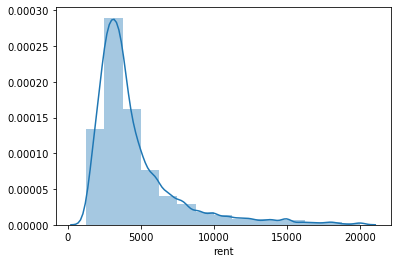

In [84]:
import seaborn as sns
sns.distplot(mh_rent['rent'],bins=15)

##### As we can see the rental prices are mainly set at actually round $3000 per month, which is satisfactory! 

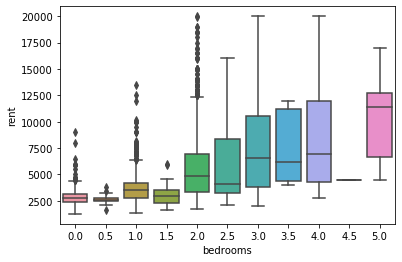

In [85]:
sns.boxplot(x='bedrooms', y= 'rent', data=mh_rent)

##### Remember, we need a 3 bedromms apartment, for we have two children. 

##### The boxplot shoews us that there are not very many offers to the desired price about $3000 per month. But we still have a choice!
  




#### Now we can explore a particular rental place and its venues in detail

In [29]:
import pandas as pd

#### Mapping Manhattan Subway locations

In [87]:
mh_sub=pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
mh_sub.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


#### Mapping Manhattan showing the location of subway stations


In [88]:
latitude=40.7308619
longitude=-73.9871558

map_mh_sub = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mh_sub['GTFS Latitude'], mh_sub['GTFS Longitude'],  mh_sub['Stop Name'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_sub) 
map_mh_sub

In [92]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


### 5. Results and Discussion

#### CONSOLIDATE Map of Manhattan showing places for rent and the subway locations nearby

In [108]:
latitude= 40.7308619
longitude= -73.9871558

map_mh_cons = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'],'$' + mh_rent['rent'].astype(str)):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_cons) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mh_sub['GTFS Latitude'], mh_sub['GTFS Longitude'],  mh_sub['Stop Name'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_cons) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_cons)

map_mh_cons

**To remember the the main question asked in the 1. Section**

_**Question:**
I would like to have a choice of locations with the following criteria: 

_Apartment with min 3 bedrooms (we have 2 kids in our family)_

_Monthly rent of the apartment not to exceed US$3000/month_

_Flat should be located within walking distance (up to 2.0 km) from a subway metro station in New York_

Area of the flat with amenities and venues some similar to the ones described for current location_

**Apartment Selection**

Using the "map_mh_cons" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

I can now choose the apartment which correlates with my idea: 

- of price (US$3000/month)
- of flat size (with min 3 bedrooms)
- up to 2.0 km from a subway metro station
- amenities and venues some similar to the ones described for current location in Frankfurt


### Discussion 

**In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course**

**As to me, this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.**

**I hope I have created a good project that I can present to potential employers as an example to show my potential.**

**With this work, I believe I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.**


### 6. Conclusion

**I feel rewarded with the efforts and time spent to the project.** 

**I believe this course with all the topics covered is well worthy of appreciation is to be recommended to other people willing to get theoretical and practical tools when learning Data Science.**

**This project has shown me a practical application to resolve a real-world situation that has impacting personal and financial impact using diverse Data Science tools.**

**The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend it for use in similar situations.**

**One must keep abreast of new tools for Data Science that continue to appear for application in several business fields.**
